%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Grab and process the raw data for amazon cell users.
amazon_raw = pd.read_csv("C:/Users/Bharath/Documents/Thinkful/Bootcamp/FeedbackAnalaysis/amazon_cells_labelled.txt", delimiter= '\t', header=None)
amazon_raw.columns = ['text', 'sentiment']

In [5]:
keywords = ['disappoint', 'Beware', 'flawed','flaw','low', 'does not', 'unhappy', 'Bad',
           'bad', 'did not work','failed','fail','no coverage','waste','sucks','drop','FOREVER','poor',
           'NOT INCLUDED','went black','not working','Don''t buy','slow','disconnected','lost',
           'useless','sending','return','hate','dislike','horrible','mistake','Worst','worst','flimsy',
           'junk','didn''t work','Avoid','Wouldn''t recommend','never work','unsatisfactory',
           'negative','refund','darn','wrong','weak','looses','USELESS','useless','POOR','problem',
           'stupid','terrible','blank','Terrible','JUNK','Junk','fails','CRAP','Don''t trust',
           'discomfort','broken','break','trouble','hang','Does not','Not good','dirty','unreliable']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

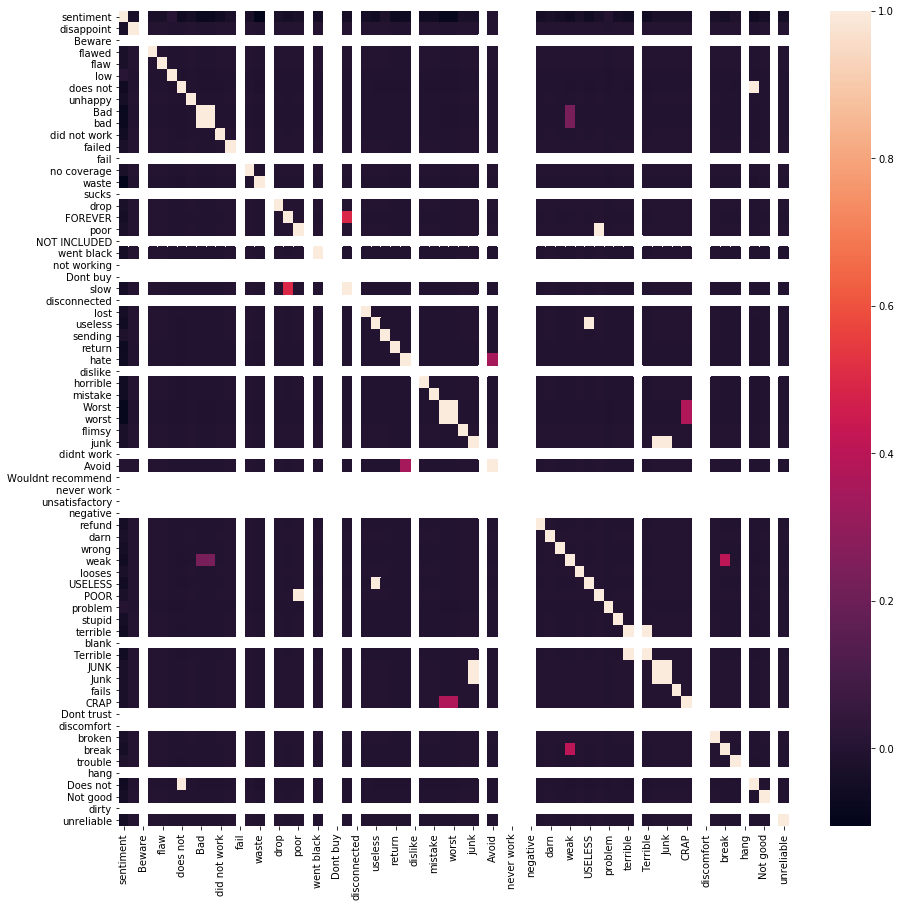

In [6]:
#Heatmap to show independence
plt.figure(figsize=(15, 15))
sns.heatmap(amazon_raw.corr())

In [7]:
#x and y values
data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


In [9]:
#Repeating with IMDB data

imdb = pd.read_csv('C:/Users/Bharath/Documents/Thinkful/Bootcamp/FeedbackAnalaysis/imdb_labelled.txt', '\t', header=None)
imdb.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    imdb[str(key)] = imdb.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = imdb[keywords]
target = imdb['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 232


In [10]:
#Repeating with Yelp data

yelp = pd.read_csv('C:/Users/Bharath/Documents/Thinkful/Bootcamp/FeedbackAnalaysis/yelp_labelled.txt', '\t', header=None)
yelp.columns = ['text', 'sentiment']

#Columns to identify if keyword in review
for key in keywords:
    yelp[str(key)] = yelp.text.str.contains(
        str(key), 
        case=False
    )

#x and y values
data = yelp[keywords]
target = yelp['sentiment']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 382


## Conclusion

We can see that Amazon data had approximately 60% accuracy, Yelp Data had 61% accuracy and IMDB data had 68% accuracy. So we can see that our model worked better with IMDB data comparitively.